In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### 1.Load the dataset and explore the variables.


In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('customer_churn.csv') 
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### 2-3.Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')


In [3]:
y = df['Churn']
X = df[['tenure','SeniorCitizen','MonthlyCharges']]
X

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70
...,...,...,...
7038,24,0,84.80
7039,72,0,103.20
7040,11,0,29.60
7041,4,1,74.40


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X_train)
X_train_normalized = transformer.transform(X_train)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_test_normalized = transformer.transform(X_test)
X_test_norm = pd.DataFrame(X_test_normalized, columns=X_test.columns)

In [11]:
y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

<Axes: >

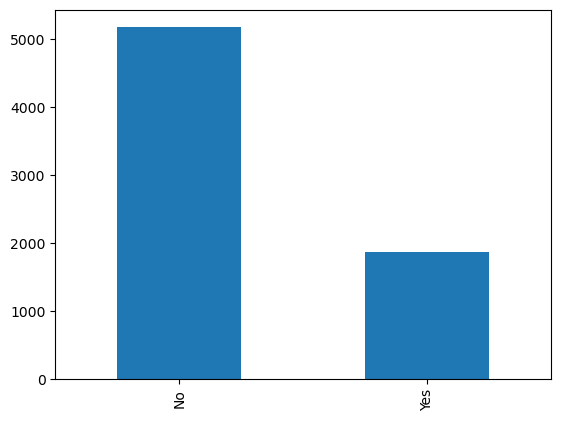

In [12]:
count_classes = df['Churn'].value_counts()
count_classes
count_classes.plot(kind = 'bar')

### 4.Build the logistic regression model

In [29]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_norm, y_train)
LR.score(X_test_norm, y_test)

0.8041163946061036

### 5.Evaluate the model

In [34]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = LR.predict(X_test_norm)

print("precision: ",precision_score(y_test,pred, pos_label='Yes'))
print("recall: ",recall_score(y_test,pred, pos_label='Yes'))
print("f1: ",f1_score(y_test,pred, pos_label='Yes'))

precision:  0.6932270916334662
recall:  0.46648793565683644
f1:  0.5576923076923076


### 6.Even a simple model will give us more than 70% accuracy. Why?

The LR score is 80% but when we look at the precision and even more the recall, we can see that we missed 46% of churn customer because the target is balanced. To avoid this we can try an oversampling.

#### Oversampling

In [37]:
from sklearn.utils import resample
train = pd.concat([X_train_norm, y_train],axis=1)
train.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,0.291667,0.0,0.464375,No
1,0.750000,0.0,0.786746,No
2,0.013889,0.0,0.051819,Yes
3,0.055556,0.0,0.517688,Yes
4,0.000000,0.0,0.434978,No


In [38]:
yes_churn = train[train['Churn']=='Yes']
no_churn = train[train['Churn']=='No']
display(yes_churn.shape)
display(no_churn.shape)

(1496, 4)

(4138, 4)

In [39]:
yes_churn_oversampled = resample(yes_churn, 
                                    replace=True, 
                                    n_samples = len(no_churn),
                                    random_state=0)
display(no_churn.shape)
display(yes_churn_oversampled.shape)

(4138, 4)

(4138, 4)

In [40]:
train_oversampled = pd.concat([no_churn,yes_churn_oversampled],axis=0)
train_oversampled.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,0.291667,0.0,0.464375,No
1,0.750000,0.0,0.786746,No
4,0.000000,0.0,0.434978,No
5,0.097222,0.0,0.511211,No
6,0.444444,0.0,0.006976,No


In [42]:
y_train_over = train_oversampled['Churn']
X_train_over = train_oversampled.drop('Churn',axis = 1)

In [45]:
print("precision: ",precision_score(y_test,pred, pos_label='Yes'))
print("recall: ",recall_score(y_test,pred, pos_label='Yes'))
print("f1: ",f1_score(y_test,pred, pos_label='Yes'))

precision:  0.5134168157423972
recall:  0.7694369973190348
f1:  0.6158798283261803


The model was less good at predicting the number of customers that are still subscribers but the advantage is that it identified more client that are churn customers.

### 7.Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [22]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=100, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_norm,y_train)
X_train_SMOTE.shape

(8276, 3)

In [26]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_norm)

print("precision: ",precision_score(y_test,pred, pos_label='Yes'))
print("recall: ",recall_score(y_test,pred, pos_label='Yes'))
print("f1: ",f1_score(y_test,pred, pos_label='Yes'))

precision:  0.5125448028673835
recall:  0.7667560321715817
f1:  0.6143931256713211


Like the oversampling, the SMOTE improved the model to focus on churn customers.